In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from intake.source.cache import display


def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip()
            data[tag]=text
        item_list.append(data)
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [2]:
import requests
import datetime
import certifi
import ssl

def get_data(gu_code, search_date):
    url = "http://apis.data.go.kr/1613000/RTMSDataSvcAptTrade/getRTMSDataSvcAptTrade?"
    service_key = "01K5GY%2BOqRwRKCTe5O6JRPa3GMbKfjksVKi64n3xuOpFncW%2BGAebIxWQ3TDL21HwVCAWPw4p7mkpxuM0Mp3wLQ%3D%3D"
    page_no = "1"
    num_of_rows = "10000000"

    call_code = "serviceKey=" + service_key + "&" + \
            "LAWD_CD=" + gu_code + "&" + \
            "DEAL_YMD=" + search_date + "&" + \
            "pageNo=" + page_no + "&" + "numOfRows=" + num_of_rows

    res = requests.get(url + call_code, verify=certifi.where())
    return res

In [3]:
# #search_year_list = ["2019","2020","2021","2022","2023","2024"]
# gu_code_list = ["41281", "41285", "41287"]
# items_list = []
# for gu_code in gu_code_list:
#     for year in range(2022,2025):
#         year = str(year)
#         for month in range (1,13):
#             month_str = str(month).zfill(2)
#             year_month = year+month_str
#             res = get_data(gu_code, year_month)
#             items_list += get_items(res)
# len(items_list)


In [4]:
search_date_list = ["202201","202202","202203","202204","202205","202206","202207","202208","202209","202210","202211","202212","202301", "202302", "202303", "202304", "202305", "202306", "202307", "202308", "202309", "202310","202311","202312","202401", "202402", "202403", "202404", "202405", "202406", "202407", "202408"]
gu_code_list = ["41281", "41285", "41287"]
tx_list = []
for search_date in search_date_list:
    for gu_code in gu_code_list:
        res = get_data(gu_code, search_date)
        tx_list += get_items(res)
    
len(tx_list)

17571

In [104]:
# search_date_list = ["202201"]
# gu_code_list = ["41287"]
# tx_list2 = []
# for search_date in search_date_list:
#     for gu_code in gu_code_list:
#         res = get_data(gu_code, search_date)
#         tx_list2 += get_items(res)
#     
# len(tx_list2)

103

In [5]:
goyang_apt_tx = pd.DataFrame(tx_list)
goyang_apt_tx

,aptDong,aptNm,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,estateAgentSggNm,excluUseAr,floor,jibun,landLeaseholdGbn,rgstDate,sggCd,slerGbn,umdNm
0,,햇빛주공23,1996,,,,"40,000",28,1,2022,중개거래,경기 고양덕양구,49.96,7,953,N,,41281,,행신동
1,,푸른마을10단지,2009,,,,"50,500",27,1,2022,중개거래,경기 고양덕양구,106.4462,13,1121,N,,41281,,고양동
2,,도래울파크뷰,2013,,,,"79,000",29,1,2022,중개거래,경기 고양덕양구,84.38,15,1103,N,,41281,,도내동
3,,햇빛주공23,1996,,,,"43,000",28,1,2022,중개거래,경기 고양덕양구,59.97,13,953,N,,41281,,행신동
4,,은빛마을11단지,1996,,,,"47,600",22,1,2022,중개거래,경기 고양덕양구,50,11,961,N,,41281,,화정동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17566,,탄현마을(부영3),1995,개인,,,"21,000",4,8,2024,중개거래,경기 고양시일산서구,46.58,10,1484,N,,41287,개인,탄현동
17567,1403,강선마을14단지두산,1994,개인,,,"42,000",5,8,2024,중개거래,경기 고양시 일산서구,59.76,13,101,N,24.08.23,41287,개인,주엽동
17568,2,미주(19-8),1989,개인,,,"11,000",1,8,2024,중개거래,경기 고양시 일산서구,57.5,5,1735,N,24.09.06,41287,개인,일산동
17569,,후곡마을(주공),1995,개인,,,"36,000",3,8,2024,중개거래,경기 고양시 일산서구,68.13,6,1103,N,,41287,개인,일산동


In [6]:
# 해제된 매매 데이터 삭제
goyang_apt_tx = goyang_apt_tx[goyang_apt_tx.cdealType!="O"]

In [7]:
goyang_apt_tx

,aptDong,aptNm,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,estateAgentSggNm,excluUseAr,floor,jibun,landLeaseholdGbn,rgstDate,sggCd,slerGbn,umdNm
0,,햇빛주공23,1996,,,,"40,000",28,1,2022,중개거래,경기 고양덕양구,49.96,7,953,N,,41281,,행신동
1,,푸른마을10단지,2009,,,,"50,500",27,1,2022,중개거래,경기 고양덕양구,106.4462,13,1121,N,,41281,,고양동
2,,도래울파크뷰,2013,,,,"79,000",29,1,2022,중개거래,경기 고양덕양구,84.38,15,1103,N,,41281,,도내동
3,,햇빛주공23,1996,,,,"43,000",28,1,2022,중개거래,경기 고양덕양구,59.97,13,953,N,,41281,,행신동
4,,은빛마을11단지,1996,,,,"47,600",22,1,2022,중개거래,경기 고양덕양구,50,11,961,N,,41281,,화정동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17566,,탄현마을(부영3),1995,개인,,,"21,000",4,8,2024,중개거래,경기 고양시일산서구,46.58,10,1484,N,,41287,개인,탄현동
17567,1403,강선마을14단지두산,1994,개인,,,"42,000",5,8,2024,중개거래,경기 고양시 일산서구,59.76,13,101,N,24.08.23,41287,개인,주엽동
17568,2,미주(19-8),1989,개인,,,"11,000",1,8,2024,중개거래,경기 고양시 일산서구,57.5,5,1735,N,24.09.06,41287,개인,일산동
17569,,후곡마을(주공),1995,개인,,,"36,000",3,8,2024,중개거래,경기 고양시 일산서구,68.13,6,1103,N,,41287,개인,일산동


In [8]:
# 항목별 범주형 데이터 확인
# goyang_apt_tx['buildYear'].value_counts()
# goyang_apt_tx['dealingGbn'].value_counts()
# goyang_apt_tx['floor'].value_counts()
# goyang_apt_tx['sggCd'].value_counts()
goyang_apt_tx['umdNm'].value_counts()

umdNm
행신동     1922
일산동     1853
탄현동     1674
화정동     1413
주엽동     1191
중산동      912
백석동      693
마두동      666
식사동      651
풍동       587
향동동      568
도내동      554
덕이동      432
성사동      428
대화동      385
고양동      364
신원동      336
가좌동      279
장항동      267
토당동      240
지축동      237
삼송동      195
주교동      184
관산동      175
원흥동      148
동산동      129
사리현동     127
덕은동       99
성석동       17
Name: count, dtype: int64

In [9]:
# 수치형 데이터 기본 EDA
# goyang_apt_tx['dealAmount'].describe()
goyang_apt_tx['excluUseAr'].describe()

count     16726
unique      960
top       59.97
freq        399
Name: excluUseAr, dtype: object

In [10]:
goyang_apt_tx

,aptDong,aptNm,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,estateAgentSggNm,excluUseAr,floor,jibun,landLeaseholdGbn,rgstDate,sggCd,slerGbn,umdNm
0,,햇빛주공23,1996,,,,"40,000",28,1,2022,중개거래,경기 고양덕양구,49.96,7,953,N,,41281,,행신동
1,,푸른마을10단지,2009,,,,"50,500",27,1,2022,중개거래,경기 고양덕양구,106.4462,13,1121,N,,41281,,고양동
2,,도래울파크뷰,2013,,,,"79,000",29,1,2022,중개거래,경기 고양덕양구,84.38,15,1103,N,,41281,,도내동
3,,햇빛주공23,1996,,,,"43,000",28,1,2022,중개거래,경기 고양덕양구,59.97,13,953,N,,41281,,행신동
4,,은빛마을11단지,1996,,,,"47,600",22,1,2022,중개거래,경기 고양덕양구,50,11,961,N,,41281,,화정동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17566,,탄현마을(부영3),1995,개인,,,"21,000",4,8,2024,중개거래,경기 고양시일산서구,46.58,10,1484,N,,41287,개인,탄현동
17567,1403,강선마을14단지두산,1994,개인,,,"42,000",5,8,2024,중개거래,경기 고양시 일산서구,59.76,13,101,N,24.08.23,41287,개인,주엽동
17568,2,미주(19-8),1989,개인,,,"11,000",1,8,2024,중개거래,경기 고양시 일산서구,57.5,5,1735,N,24.09.06,41287,개인,일산동
17569,,후곡마을(주공),1995,개인,,,"36,000",3,8,2024,중개거래,경기 고양시 일산서구,68.13,6,1103,N,,41287,개인,일산동


In [11]:
len(goyang_apt_tx)

16726

In [12]:
# 결측치 제거(제거되는 항목 없음( 
import numpy as np
goyang_apt_tx.replace('', np.nan, inplace=True)

C:\Users\KMAC\AppData\Local\Temp\ipykernel_23892\295516798.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  goyang_apt_tx.replace('', np.nan, inplace=True)
C:\Users\KMAC\AppData\Local\Temp\ipykernel_23892\295516798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goyang_apt_tx.replace('', np.nan, inplace=True)


In [13]:
goyang_apt_tx = goyang_apt_tx.drop(['aptDong', 'cdealDay','cdealType','buyerGbn','slerGbn','estateAgentSggNm','jibun','rgstDate', 'landLeaseholdGbn'], axis=1)

In [14]:
# 결측치 없음
goyang_apt_tx.isnull().sum()

aptNm         0
buildYear     0
dealAmount    0
dealDay       0
dealMonth     0
dealYear      0
dealingGbn    0
excluUseAr    0
floor         0
sggCd         0
umdNm         0
dtype: int64

In [15]:
# 년월 합친 열 생성
goyang_apt_tx['dealYearMonth'] = goyang_apt_tx['dealYear'] + goyang_apt_tx['dealMonth']

In [16]:
goyang_apt_tx['dealYearMonth']


0        20221
1        20221
2        20221
3        20221
4        20221
         ...  
17566    20248
17567    20248
17568    20248
17569    20248
17570    20248
Name: dealYearMonth, Length: 16726, dtype: object

In [17]:
# 수치형식 변환
goyang_apt_tx['dealAmount'] = goyang_apt_tx['dealAmount'].str.replace(',', '').astype(float)
goyang_apt_tx['buildYear'] = goyang_apt_tx['buildYear'].astype(int)
goyang_apt_tx['dealYear'] = goyang_apt_tx['dealYear'].astype(int)
goyang_apt_tx['dealMonth'] = goyang_apt_tx['dealMonth'].astype(int)
goyang_apt_tx['dealDay'] = goyang_apt_tx['dealDay'].astype(int)
goyang_apt_tx['excluUseAr'] = goyang_apt_tx['excluUseAr'].astype(float)
goyang_apt_tx['floor'] = goyang_apt_tx['floor'].astype(int)
goyang_apt_tx['sggCd'] = goyang_apt_tx['sggCd'].astype(int)


In [15]:
# 데이터 csv파일로 저장
goyang_apt_tx.to_csv('goyang_apt_tx.csv', index=True, encoding='utf-8-sig')

In [ ]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

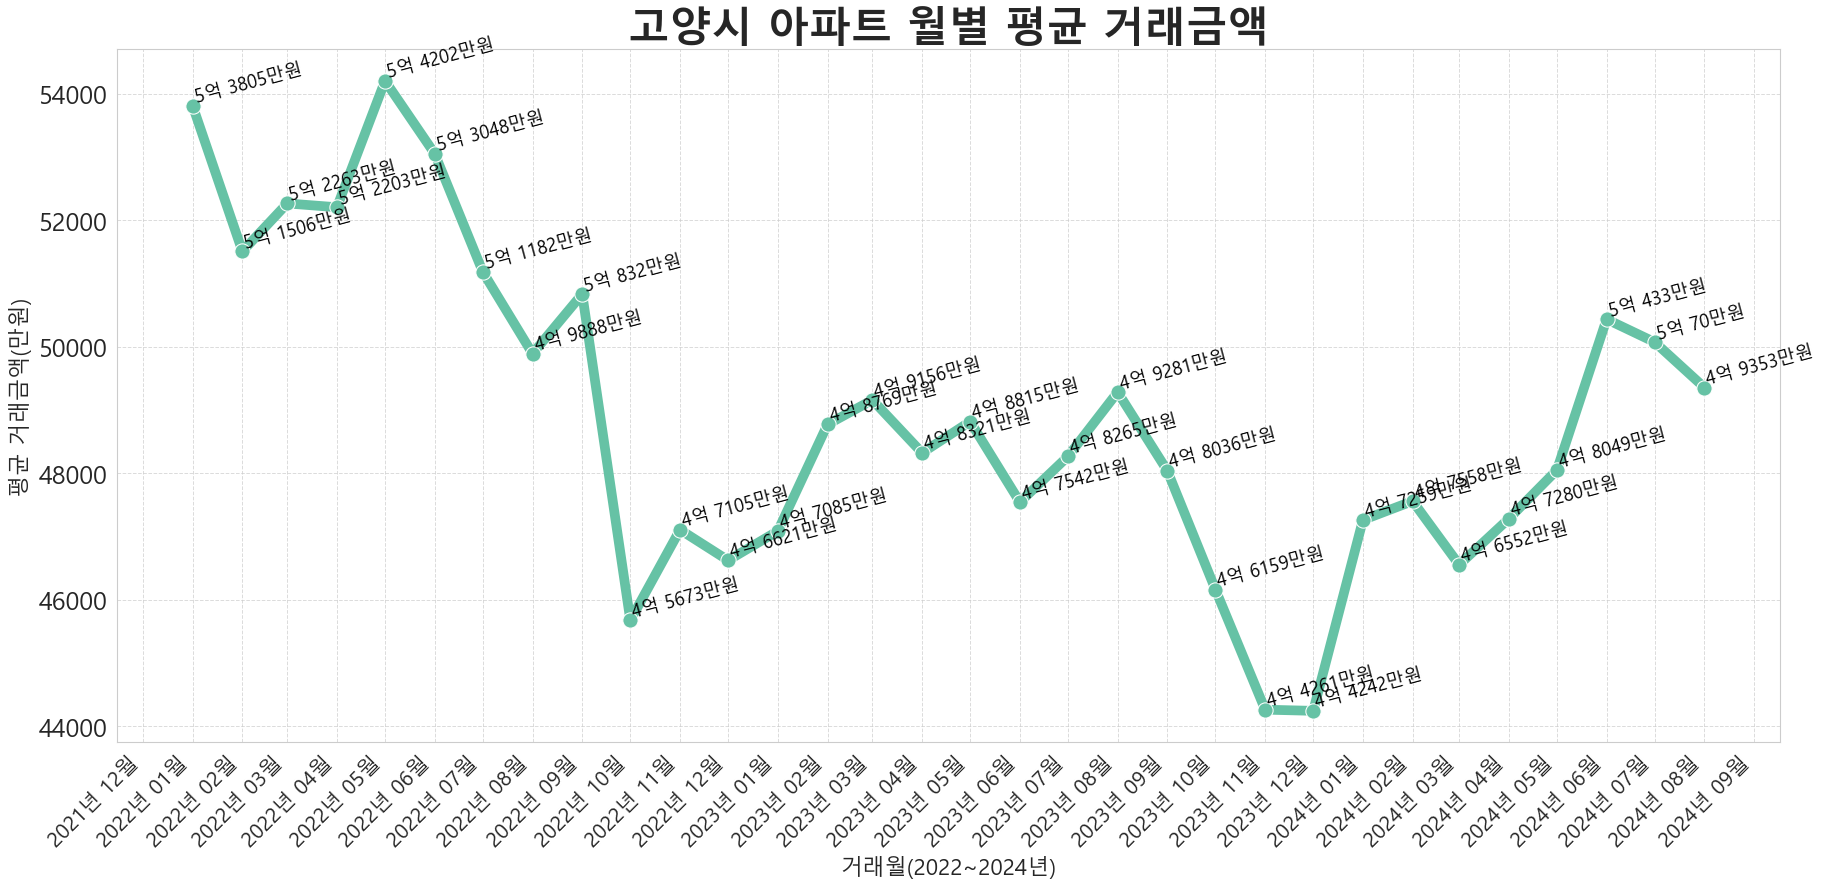

In [45]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_price = goyang_apt_tx.copy()
goyang_monthly_price['dealYearMonth'] = pd.to_datetime(goyang_monthly_price['dealYearMonth'], format='%Y%m')

# 월별 평균 거래 금액 계산
monthly_avg_price = goyang_monthly_price.groupby('dealYearMonth')['dealAmount'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_price, x='dealYearMonth', y='dealAmount', marker='o', markersize = 11, linewidth=7)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 평균 거래금액', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
# for i in range(len(monthly_avg_price)):
#     plt.text(monthly_avg_price['dealYearMonth'].iloc[i], 
#              monthly_avg_price['dealAmount'].iloc[i], 
#              f'{monthly_avg_price["dealAmount"].iloc[i]:,.0f}', 
#              ha='left', va='bottom', fontsize=13, color='black', fontweight='bold')

for i in range(len(monthly_avg_price)):
    # 거래금액을 억과 만으로 나누기 (정수로 처리)
    deal_amount = monthly_avg_price['dealAmount'].iloc[i]
    billions = int(deal_amount // 10000)  # 억 단위
    ten_thousands = int(deal_amount % 10000)  # 만 단위
    
    # 억과 만 단위를 합쳐서 원하는 형식으로 포맷
    if billions > 0:
        label = f'{billions}억 {ten_thousands}만원'
    else:
        label = f'{ten_thousands}만원'  # 억 단위가 없을 경우

    # 텍스트 표시
    plt.text(monthly_avg_price['dealYearMonth'].iloc[i], 
             monthly_avg_price['dealAmount'].iloc[i], 
             label, 
             ha='left', va='bottom', fontsize=13, color='black',  rotation = 15)


# 그래프 표시
plt.show()


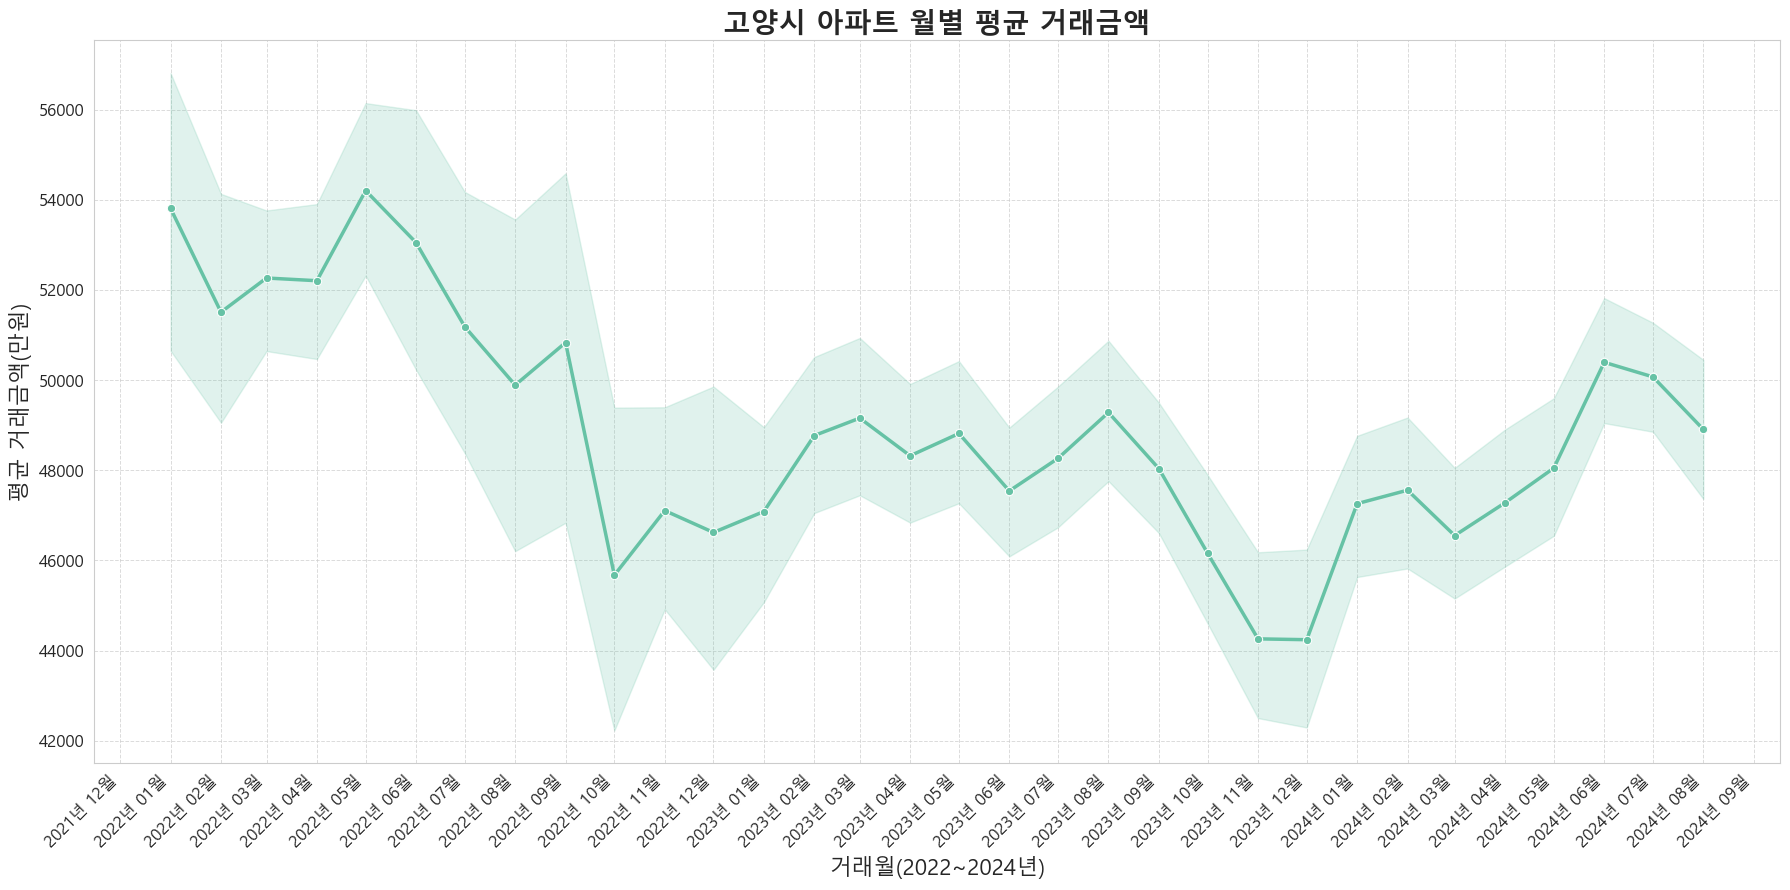

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_price = goyang_apt_tx.copy()
goyang_monthly_price['dealYearMonth'] = pd.to_datetime(goyang_monthly_price['dealYearMonth'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=goyang_monthly_price, x='dealYearMonth', y='dealAmount', marker='o', linewidth=2.5)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 평균 거래금액', fontsize=20, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

posx and posy should be finite values
posx and posy should be finite values


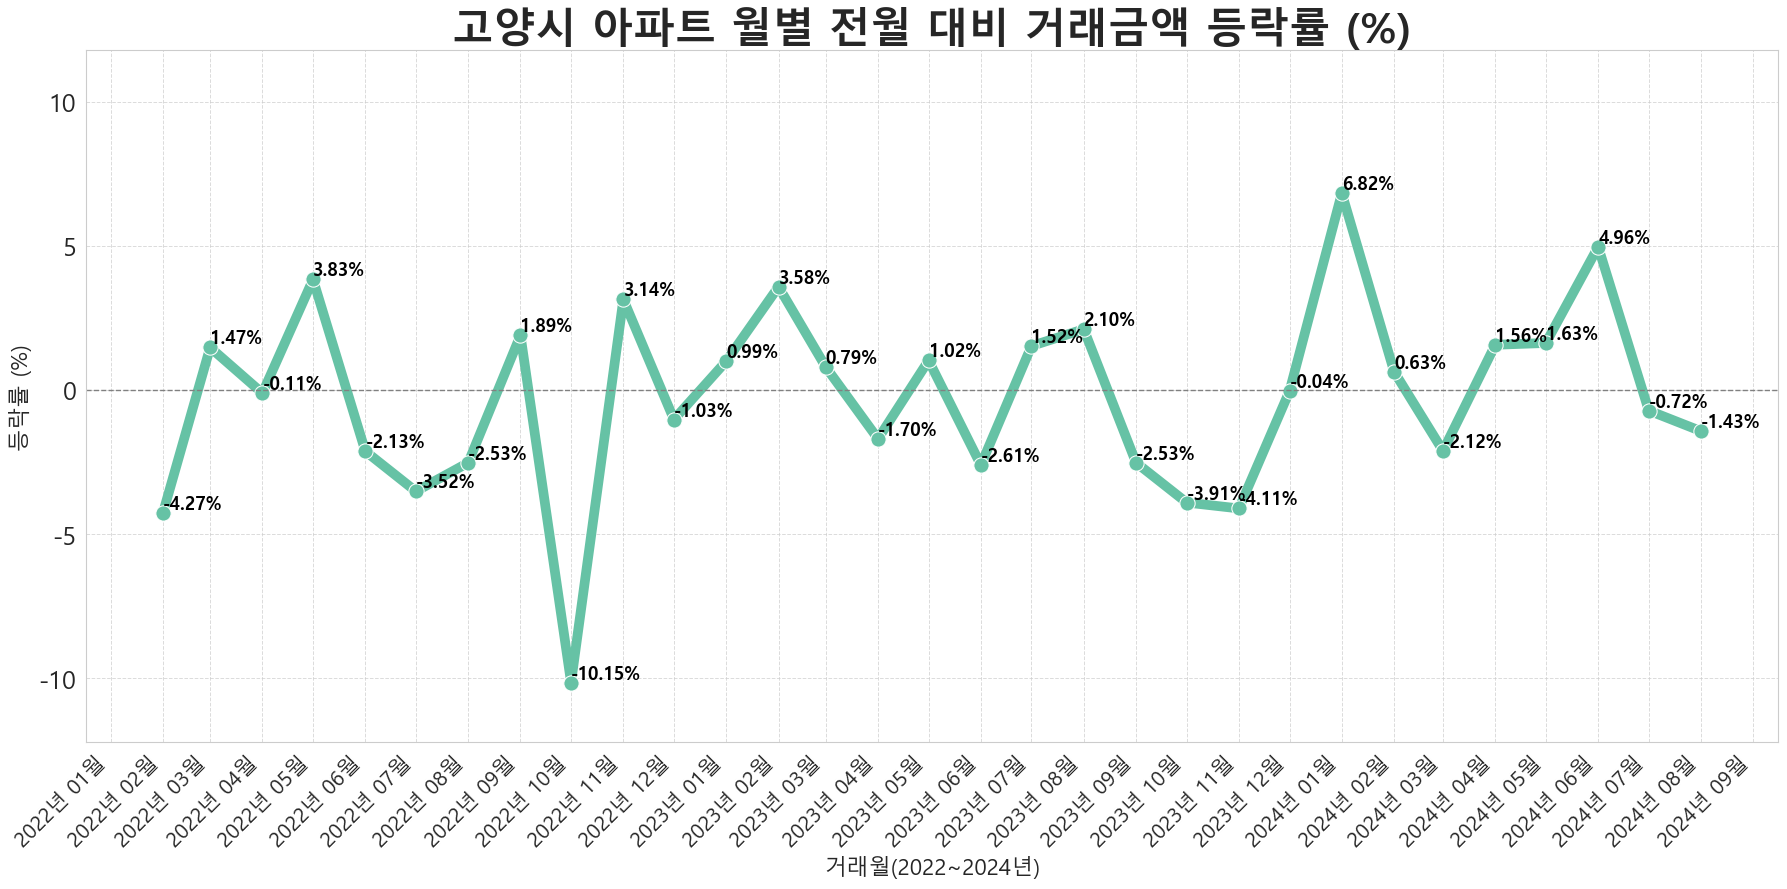

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd 

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_price = goyang_apt_tx.copy()
items_monthly_price['dealYearMonth'] = pd.to_datetime(items_monthly_price['dealYearMonth'], format='%Y%m')

# 월별 평균 거래 금액 계산
monthly_avg_price = items_monthly_price.groupby('dealYearMonth')['dealAmount'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_price = monthly_avg_price.sort_values('dealYearMonth')
monthly_avg_price['prev_dealAmount'] = monthly_avg_price['dealAmount'].shift(1)
monthly_avg_price['change_rate'] = (monthly_avg_price['dealAmount'] - monthly_avg_price['prev_dealAmount']) / monthly_avg_price['prev_dealAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_price, x='dealYearMonth', y='change_rate', marker='o', markersize = 11, linewidth=7)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 전월 대비 거래금액 등락률 (%)', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('등락률 (%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

avg = monthly_avg_price['change_rate'].mean()
avg
# y축 범위 설정 (최소값, 최대값)
plt.ylim(avg-12, avg+12)

# 그래프 위에 등락률 수치 추가
for i in range(len(monthly_avg_price)):
    plt.text(monthly_avg_price['dealYearMonth'].iloc[i], monthly_avg_price['change_rate'].iloc[i], 
             f'{monthly_avg_price["change_rate"].iloc[i]:.2f}%', 
             ha='left', va='bottom', fontsize=13, fontweight = 'bold', color='black')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


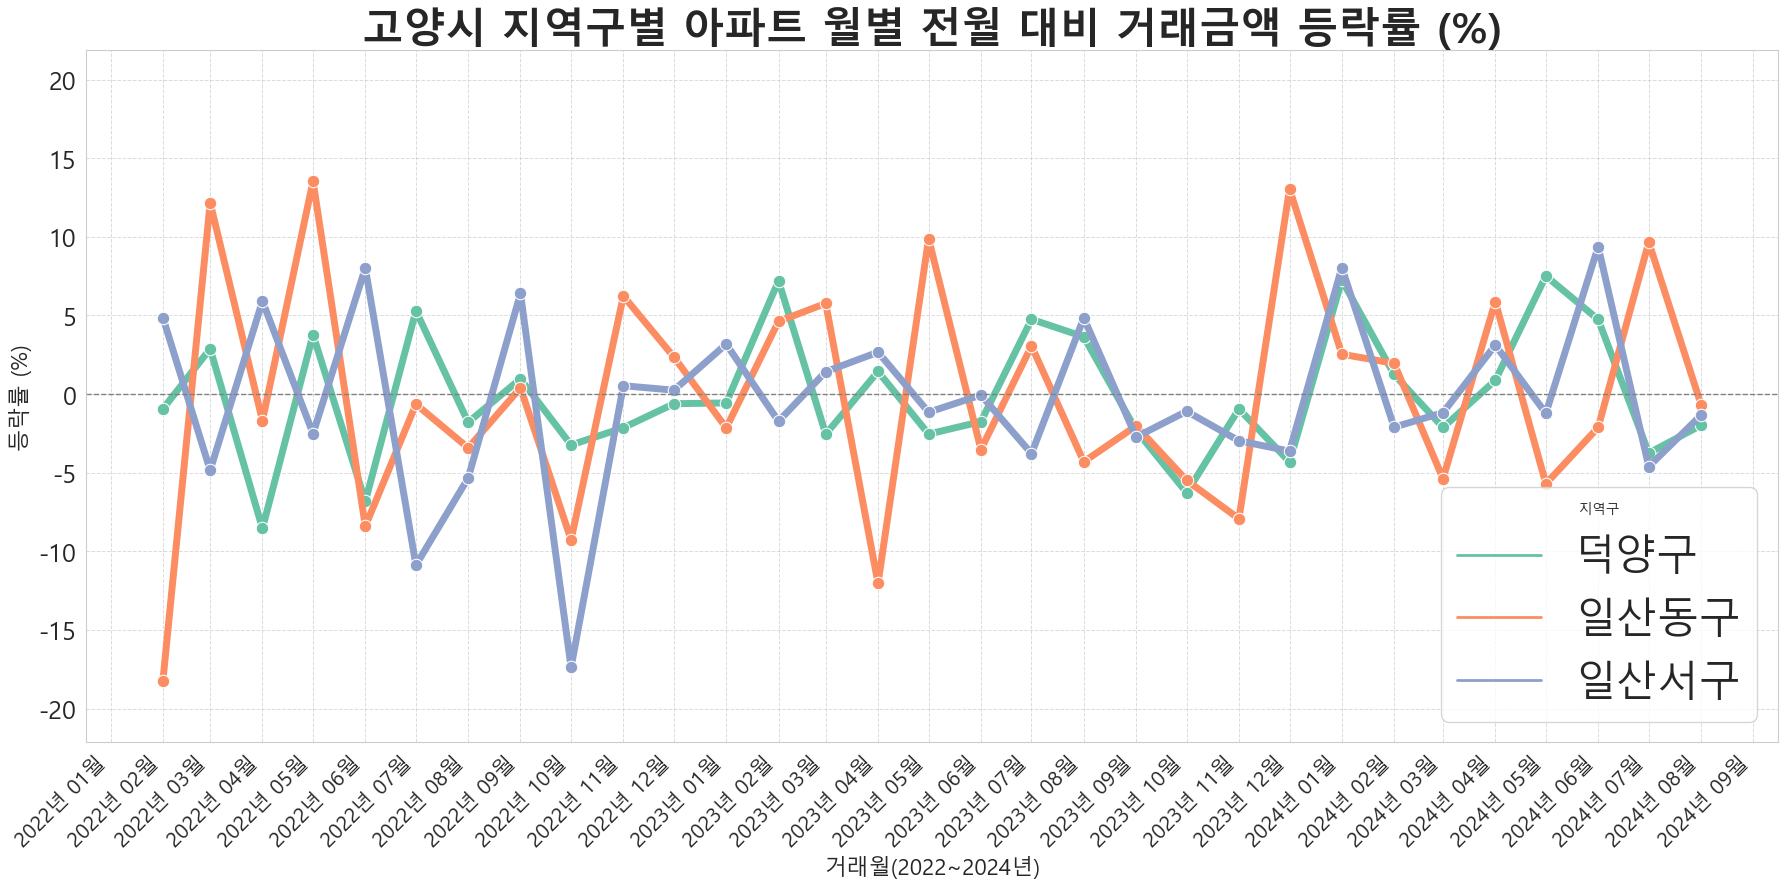

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_price = goyang_apt_tx.copy()
items_monthly_price['dealYearMonth'] = pd.to_datetime(items_monthly_price['dealYearMonth'], format='%Y%m')

# 월별 평균 거래 금액 계산 (지역구별)
monthly_avg_price = items_monthly_price.groupby(['dealYearMonth', 'sggCd'])['dealAmount'].mean().reset_index()

# 전월 대비 등락률 계산 (지역구별)
monthly_avg_price = monthly_avg_price.sort_values(['sggCd', 'dealYearMonth'])
monthly_avg_price['prev_dealAmount'] = monthly_avg_price.groupby('sggCd')['dealAmount'].shift(1)
monthly_avg_price['change_rate'] = (monthly_avg_price['dealAmount'] - monthly_avg_price['prev_dealAmount']) / monthly_avg_price['prev_dealAmount'] * 100

# 결측값 제거
monthly_avg_price = monthly_avg_price.dropna(subset=['change_rate'])

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_price, x='dealYearMonth', y='change_rate', hue='sggCd', marker='o', markersize = 9, linewidth=5, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 월별 전월 대비 거래금액 등락률 (%)', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('등락률 (%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

avg = monthly_avg_price['change_rate'].mean()
avg
# y축 범위 설정 (최소값, 최대값)
plt.ylim(avg-22, avg+22)

legend_labels = ['덕양구', '일산동구', '일산서구']  # 원하는 범례 레이블로 수정
handles = [Line2D([0], [0], color=sns.color_palette("Set2")[i], lw=2) for i in range(len(legend_labels))]
plt.legend(handles=handles, labels=legend_labels, title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
monthly_avg_price

In [19]:
items_monthly_price['change_rate']

KeyError: 'change_rate'

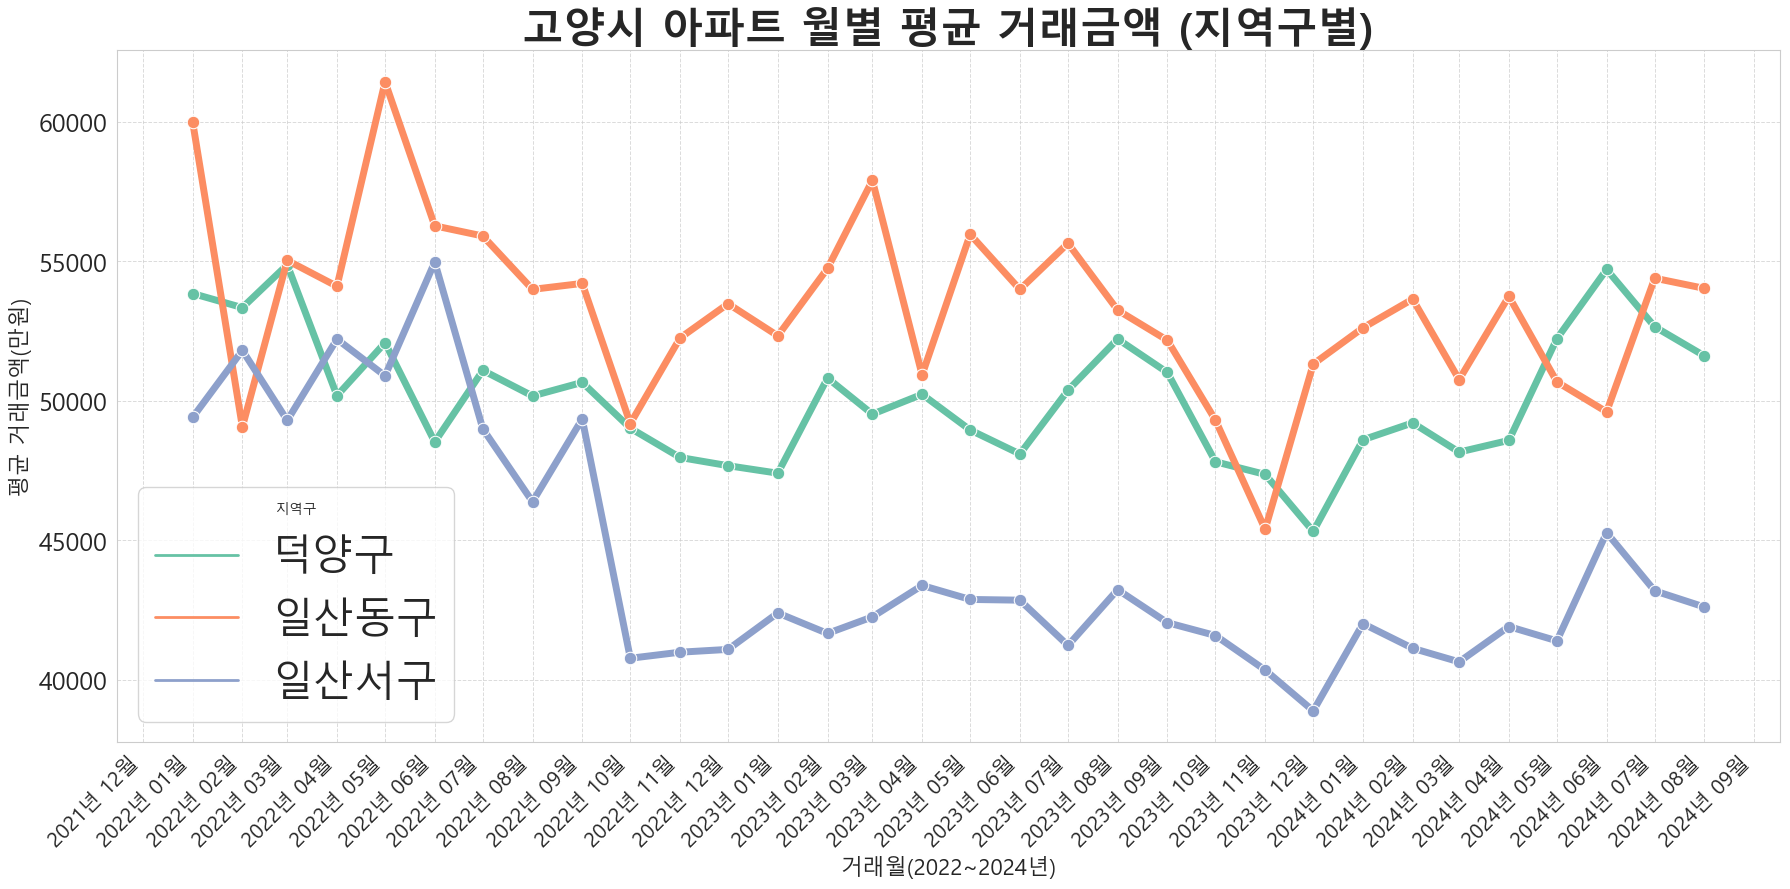

In [44]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.lines import Line2D


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
items_monthly_price = goyang_apt_tx.copy()
items_monthly_price['dealYearMonth'] = pd.to_datetime(items_monthly_price['dealYearMonth'], format='%Y%m')

# 지역구 목록 추출 (예시로 '지역구1', '지역구2', '지역구3'로 가정)
regions = items_monthly_price['sggCd'].unique()  # 'sggCd'을 지역구를 나타내는 열 이름으로 변경

# 월별 평균 거래 금액 계산
monthly_avg_price = items_monthly_price.groupby(['dealYearMonth', 'sggCd'])['dealAmount'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 27), sharex=True)  # 3개의 서브플롯 생성

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용

# 각 지역구별로 선 그래프 그리기
for region in regions:
    region_data = monthly_avg_price[monthly_avg_price['sggCd'] == region]
    sns.lineplot(data=region_data, x='dealYearMonth', y='dealAmount', errorbar = 'se',
                 marker='o',  markersize = 9, linewidth=5, label=region )

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 평균 거래금액 (지역구별)', fontsize=30, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 사용자 정의 범례 설정
legend_labels = ['덕양구', '일산동구', '일산서구']  # 원하는 범례 레이블로 수정
handles = [Line2D([0], [0], color=sns.color_palette("Set2")[i], lw=2) for i in range(len(legend_labels))]
plt.legend(handles=handles, labels=legend_labels, title='지역구', fontsize=30)


plt.tight_layout()  # suptitle 공간을 고려하여 조정

# 그래프 표시
plt.show()


In [40]:
items_monthly_price

,aptNm,buildYear,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,excluUseAr,floor,sggCd,umdNm,dealYearMonth
0,햇빛주공23,1996,40000.0,28,1,2022,중개거래,49.9600,7,41281,행신동,2022-01-01
1,푸른마을10단지,2009,50500.0,27,1,2022,중개거래,106.4462,13,41281,고양동,2022-01-01
2,도래울파크뷰,2013,79000.0,29,1,2022,중개거래,84.3800,15,41281,도내동,2022-01-01
3,햇빛주공23,1996,43000.0,28,1,2022,중개거래,59.9700,13,41281,행신동,2022-01-01
4,은빛마을11단지,1996,47600.0,22,1,2022,중개거래,50.0000,11,41281,화정동,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
17566,탄현마을(부영3),1995,21000.0,4,8,2024,중개거래,46.5800,10,41287,탄현동,2024-08-01
17567,강선마을14단지두산,1994,42000.0,5,8,2024,중개거래,59.7600,13,41287,주엽동,2024-08-01
17568,미주(19-8),1989,11000.0,1,8,2024,중개거래,57.5000,5,41287,일산동,2024-08-01
17569,후곡마을(주공),1995,36000.0,3,8,2024,중개거래,68.1300,6,41287,일산동,2024-08-01


In [23]:
# count = pd.DataFrame({'dealCount':[len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20221']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20222']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20223']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20224']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20225']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20226']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20227']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20228']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20229']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202210']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202211']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202212']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20231']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20232']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20233']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20234']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20235']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20236']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20237']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20238']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20239']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202310']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202311']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='202312']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20241']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20242']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20243']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20244']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20245']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20246']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20247']), len(goyang_apt_tx.loc[goyang_apt_tx['dealYearMonth']=='20248'])],
#                       'month':['202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212','202301','202302','202303','202304','202305','202306','202307','202308','202309','202310','202311','202312','202401','202402','202403','202404','202405','202406','202407','202408']})
# 
# count

,dealCount,month
0,250,202201
1,274,202202
2,532,202203
3,579,202204
4,512,202205
5,299,202206
6,209,202207
7,159,202208
8,160,202209
9,144,202210


In [32]:
import pandas as pd

# Simplified DataFrame creation
count = goyang_apt_tx.groupby('dealYearMonth').size().reset_index(name='dealCount')

# Convert 'dealYearMonth' to datetime format
count['month'] = pd.to_datetime(count['dealYearMonth'], format='%Y%m')

# Drop the original 'dealYearMonth' column if it's no longer needed
count.drop(columns='dealYearMonth', inplace=True)

count


,dealCount,month
0,250,2022-01-01
1,144,2022-10-01
2,223,2022-11-01
3,168,2022-12-01
4,274,2022-02-01
5,532,2022-03-01
6,579,2022-04-01
7,512,2022-05-01
8,299,2022-06-01
9,209,2022-07-01


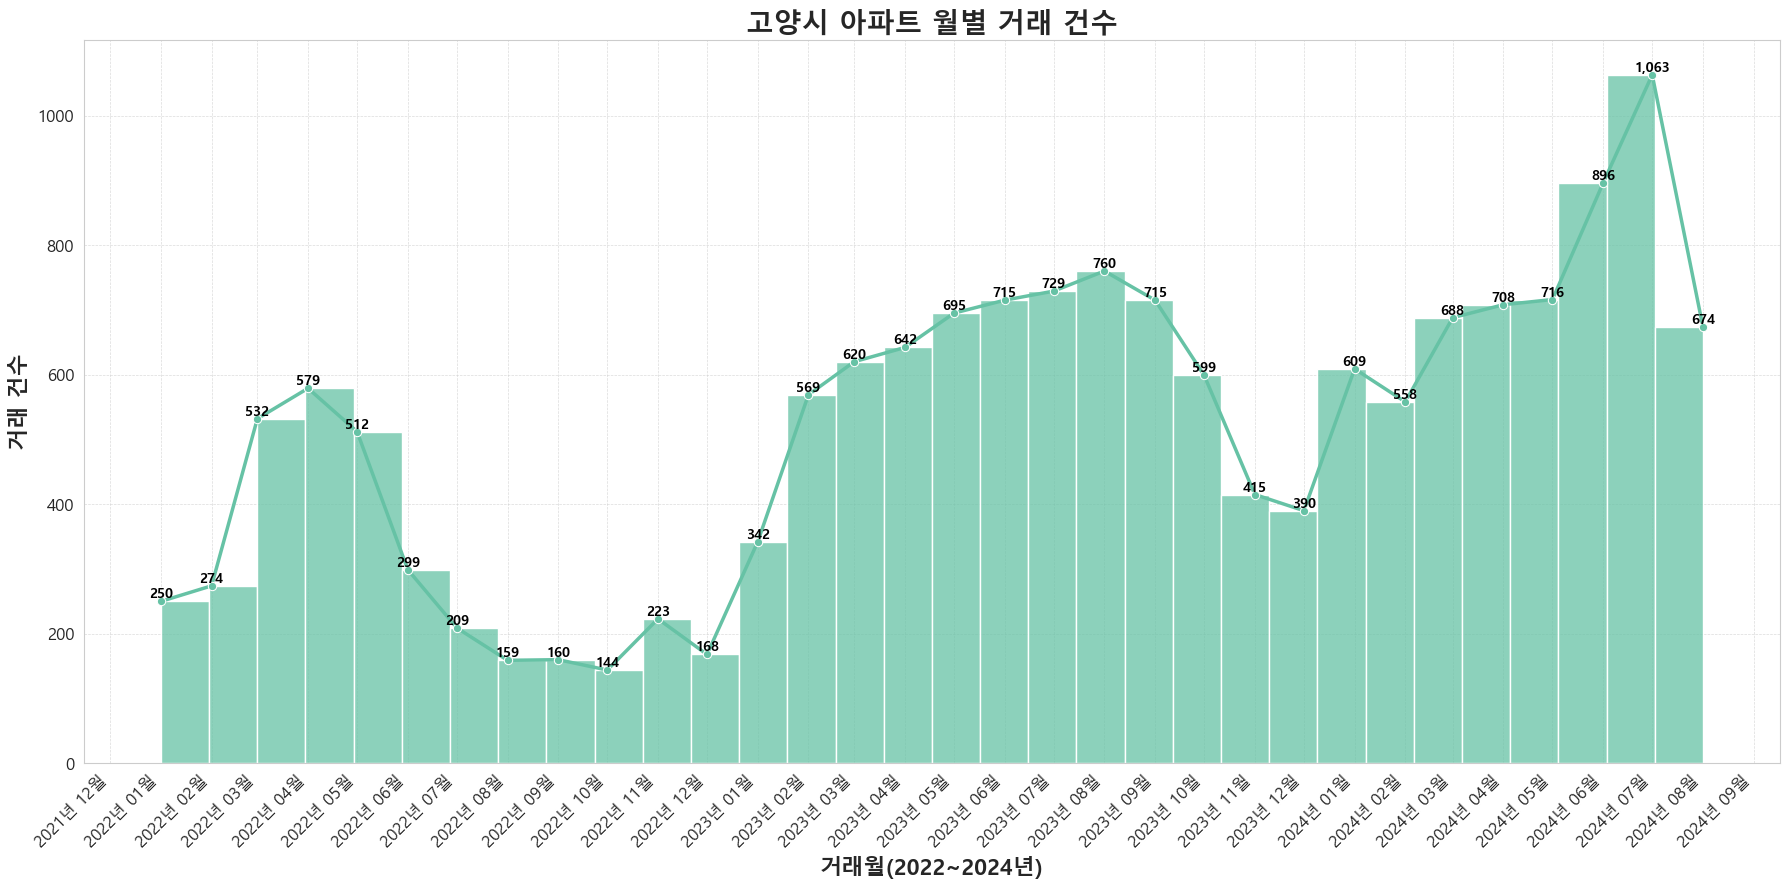

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.dates as mdates


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 날짜 형식으로 변환
count['month'] = pd.to_datetime(count['month'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
plot = sns.lineplot(data=count, x='month', y='dealCount', marker='o', linewidth=2.5)
sns.histplot(data=count, x='month', weights='dealCount', bins=len(count['month'].dt.to_period('M').unique()), kde=False)


# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 거래 건수', fontsize=20, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16, weight='bold')
plt.ylabel('거래 건수', fontsize=16, weight='bold')

# X축 눈금 레이블 포맷 설정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# 그래프 위에 월별 거래 건수 라벨 추가
for i in range(len(count)):
    plt.text(count['month'][i], count['dealCount'][i], f'{count["dealCount"][i]:,}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [40]:
monthly_counts = goyang_apt_tx.groupby(['sggCd', 'dealYearMonth']).size().reset_index(name='dealCount')
monthly_counts

,sggCd,dealYearMonth,dealCount
0,41281,20221,86
1,41281,202210,52
2,41281,202211,102
3,41281,202212,66
4,41281,20222,80
...,...,...,...
91,41287,20244,252
92,41287,20245,253
93,41287,20246,289
94,41287,20247,335


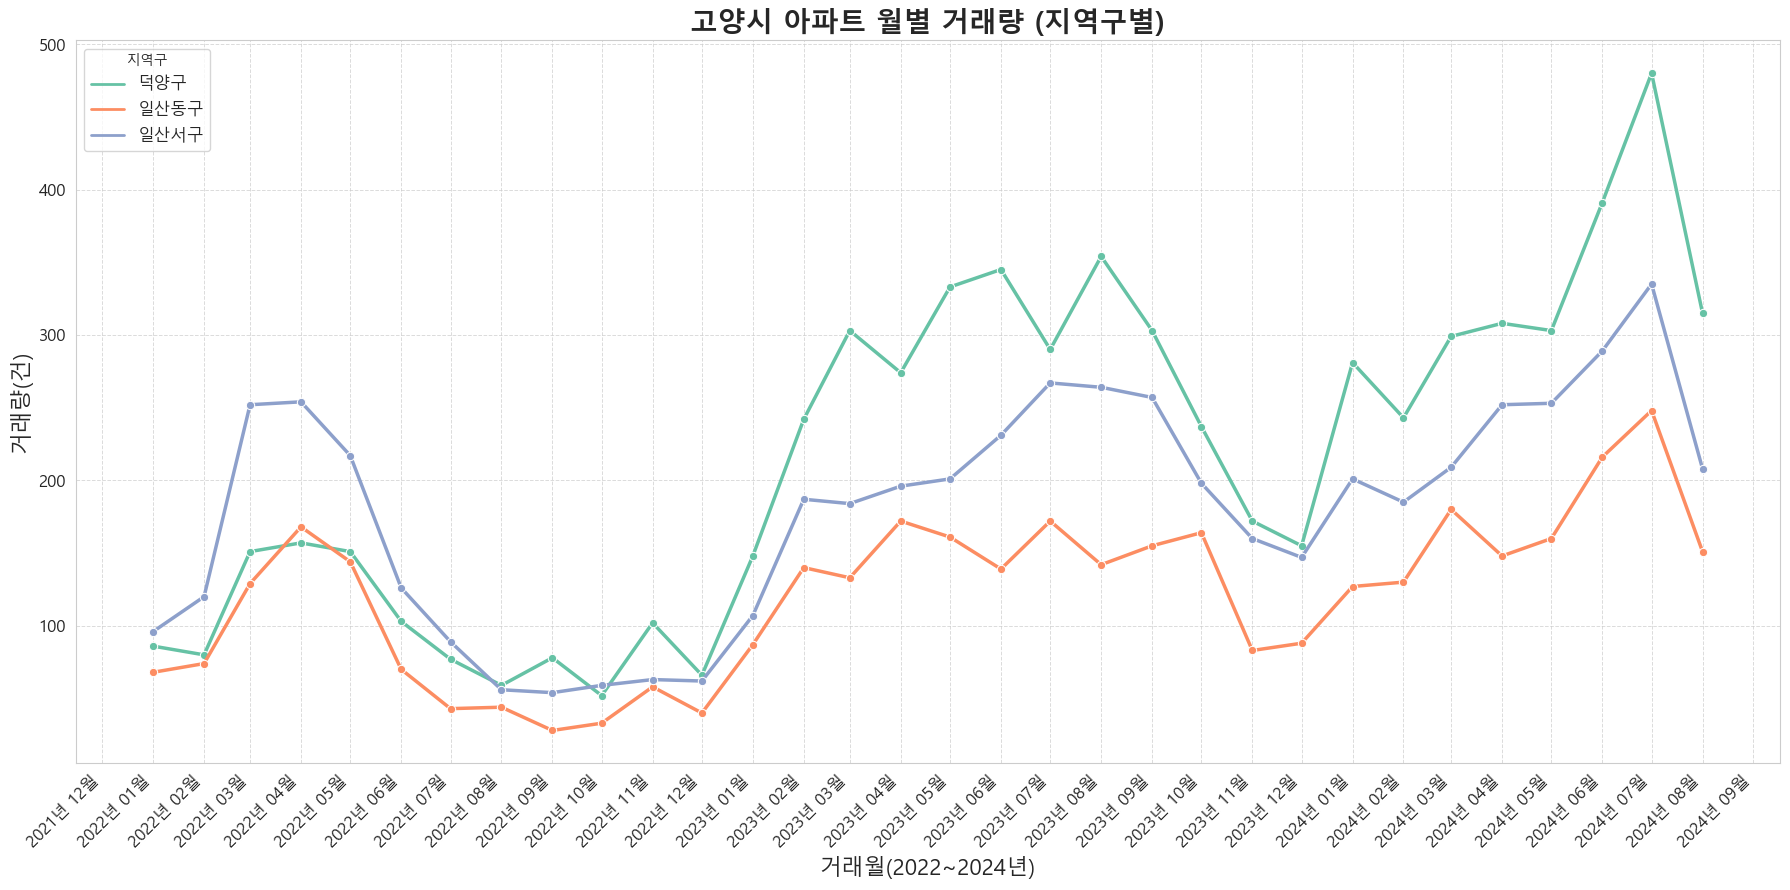

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.lines import Line2D


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
monthly_counts['dealYearMonth'] = pd.to_datetime(monthly_counts['dealYearMonth'], format='%Y%m')

# 지역구 목록 추출 (예시로 '지역구1', '지역구2', '지역구3'로 가정)
regions = monthly_counts['sggCd'].unique()  # 'sggCd'을 지역구를 나타내는 열 이름으로 변경

# 그래프 설정
plt.figure(figsize=(18, 9))
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 27), sharex=True)  # 3개의 서브플롯 생성

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용

# 각 지역구별로 선 그래프 그리기
for region in regions:
    region_data = monthly_counts[monthly_counts['sggCd'] == region]
    sns.lineplot(data=region_data, x='dealYearMonth', y='dealCount',
                 marker='o', linewidth=2.5, label=region)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 거래량 (지역구별)', fontsize=20, weight='bold')
plt.xlabel('거래월(2022~2024년)', fontsize=16)
plt.ylabel('거래량(건)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 사용자 정의 범례 설정
legend_labels = ['덕양구', '일산동구', '일산서구']  # 원하는 범례 레이블로 수정
handles = [Line2D([0], [0], color=sns.color_palette("Set2")[i], lw=2) for i in range(len(legend_labels))]
plt.legend(handles=handles, labels=legend_labels, title='지역구', fontsize=12)


plt.tight_layout()  # suptitle 공간을 고려하여 조정

# 그래프 표시
plt.show()


In [27]:
import pandas as pd
import numpy as np

items_area = goyang_apt_tx.copy()
items_area['excluUseAr'] = items_area['excluUseAr'].astype(float)
items_area['sizeCategory'] = np.where(items_area['excluUseAr'] >= 135, '대형',
                            np.where(items_area['excluUseAr'] >= 95.86, '중대형',
                            np.where(items_area['excluUseAr'] >= 62.81, '중형',
                            np.where(items_area['excluUseAr'] >= 40, '중소형', '소형'))))


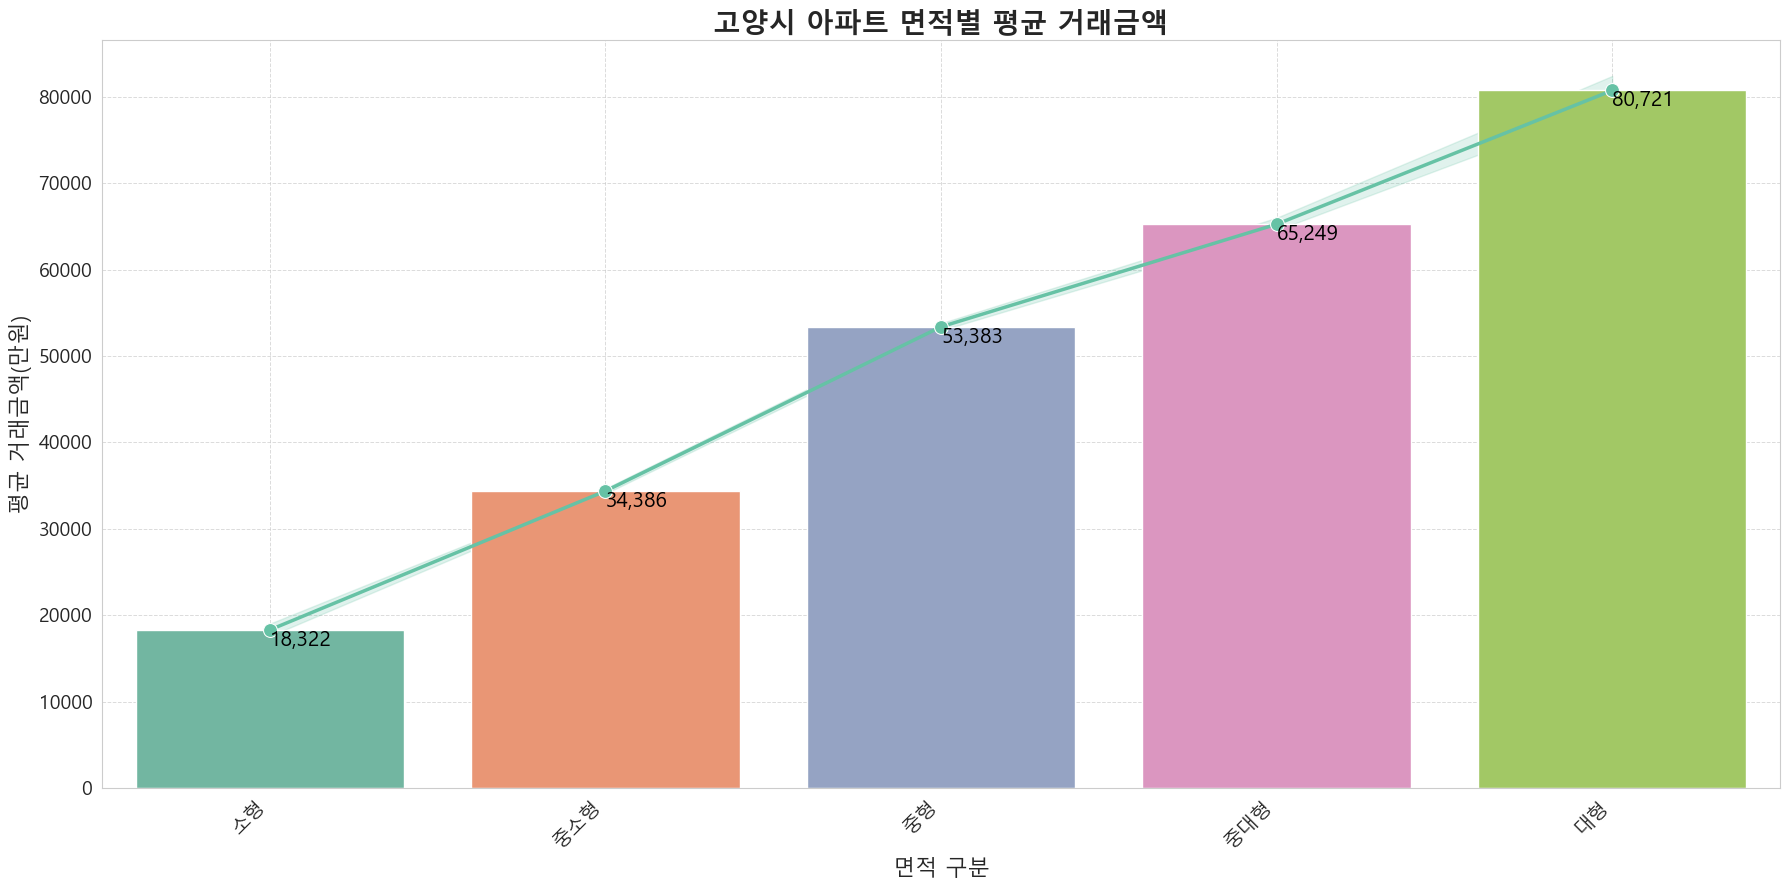

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.dates as mdates


# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)


# sizeCategory 순서 지정
size_order = ['소형', '중소형', '중형', '중대형', '대형']
items_area['sizeCategory'] = pd.Categorical(items_area['sizeCategory'], categories=size_order, ordered=True)

# sizeCategory별 평균 거래금액 계산
grouped_data = items_area.groupby('sizeCategory', as_index=False, observed=False)['dealAmount'].mean()

# 그래프 설정
plt.figure(figsize=(18, 9))
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=items_area, x='sizeCategory', y='dealAmount', 
             marker='o', markersize=10, linewidth=2.5)
sns.barplot(data=grouped_data, x='sizeCategory', y='dealAmount',  hue='sizeCategory', palette='Set2')




# 제목과 축 레이블 설정
plt.title('고양시 아파트 면적별 평균 거래금액', fontsize=20, fontweight='bold')
plt.xlabel('면적 구분', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=14)  # X축 눈금 글자 크기
plt.yticks(fontsize=14)  # Y축 눈금 글자 크기

# 눈금선 추가
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# 데이터 포인트에 라벨 추가 (평균 거래금액 표시)
for x, y in zip(grouped_data['sizeCategory'], grouped_data['dealAmount']):
    plt.text(x, y, f'{y:,.0f}', color='black', ha='left', va='top', fontsize=15)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

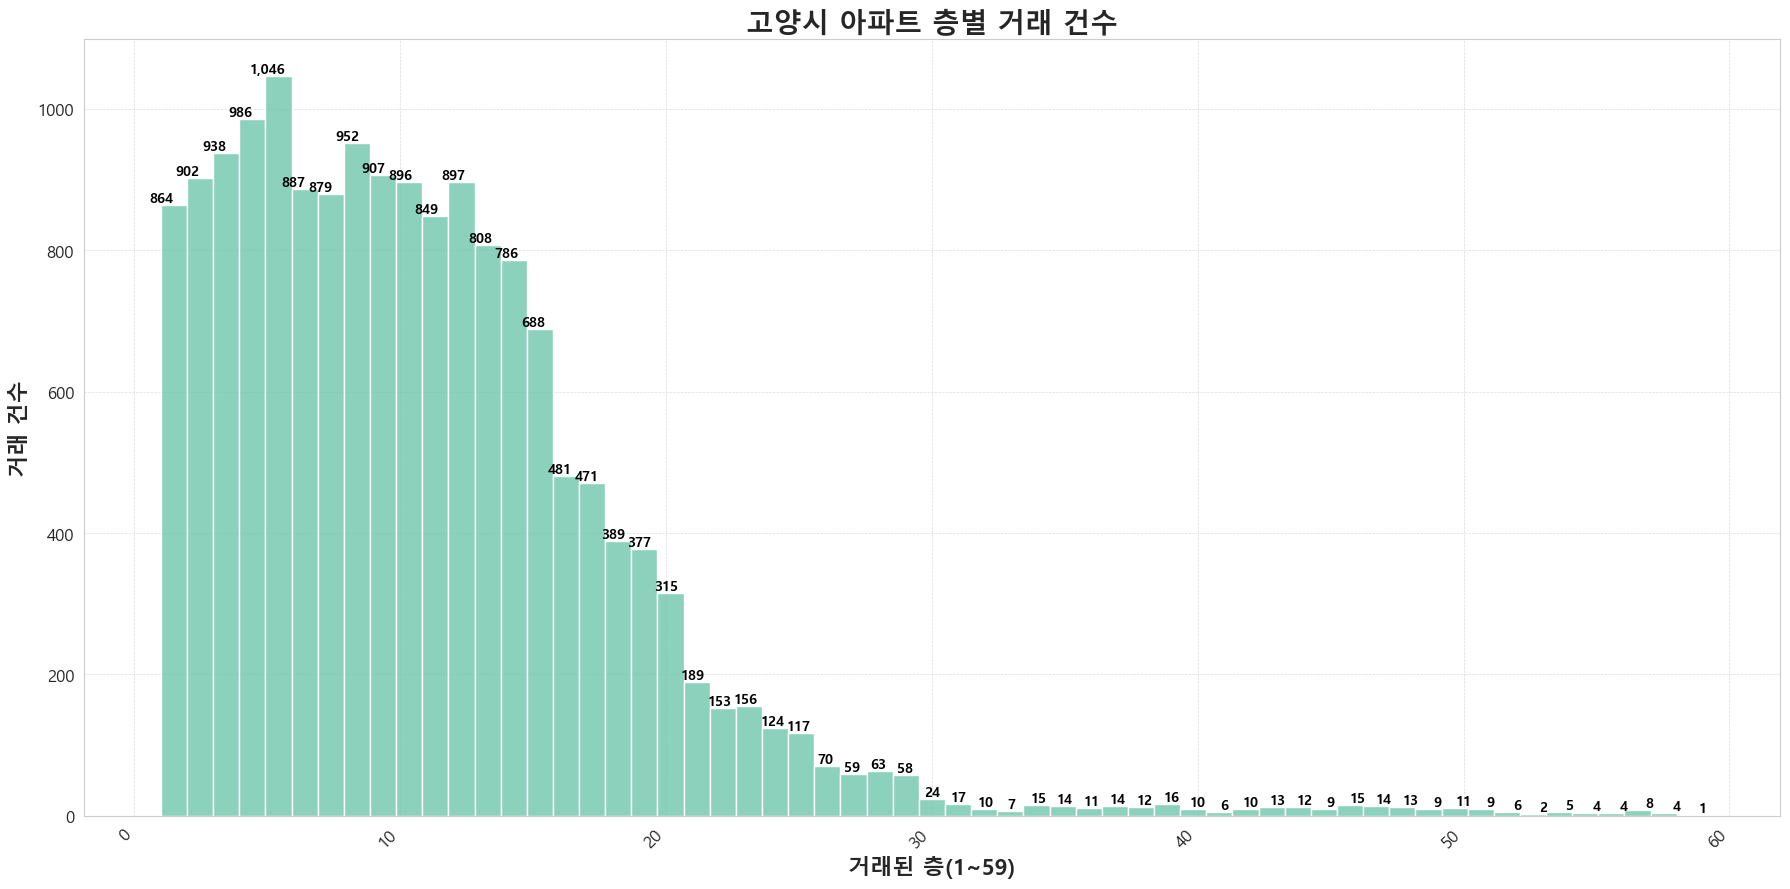

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import rcParams
import matplotlib.dates as mdates

floor_count = goyang_apt_tx.groupby('floor').size().reset_index(name='floorCount')

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 그래프 설정
plt.figure(figsize=(18, 9))
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.histplot(data=floor_count, x='floor', weights='floorCount', kde=False, bins=59)


# 제목과 축 레이블 설정
plt.title('고양시 아파트 층별 거래 건수', fontsize=20, weight='bold')
plt.xlabel('거래된 층(1~59)', fontsize=16, weight='bold')
plt.ylabel('거래 건수', fontsize=16, weight='bold')

# X축 눈금 레이블 포맷 설정
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y년 %m월'))
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# 그래프 위에 월별 거래 건수 라벨 추가
for i in range(len(floor_count)):
    plt.text(floor_count['floor'][i], floor_count['floorCount'][i], f'{floor_count["floorCount"][i]:,}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


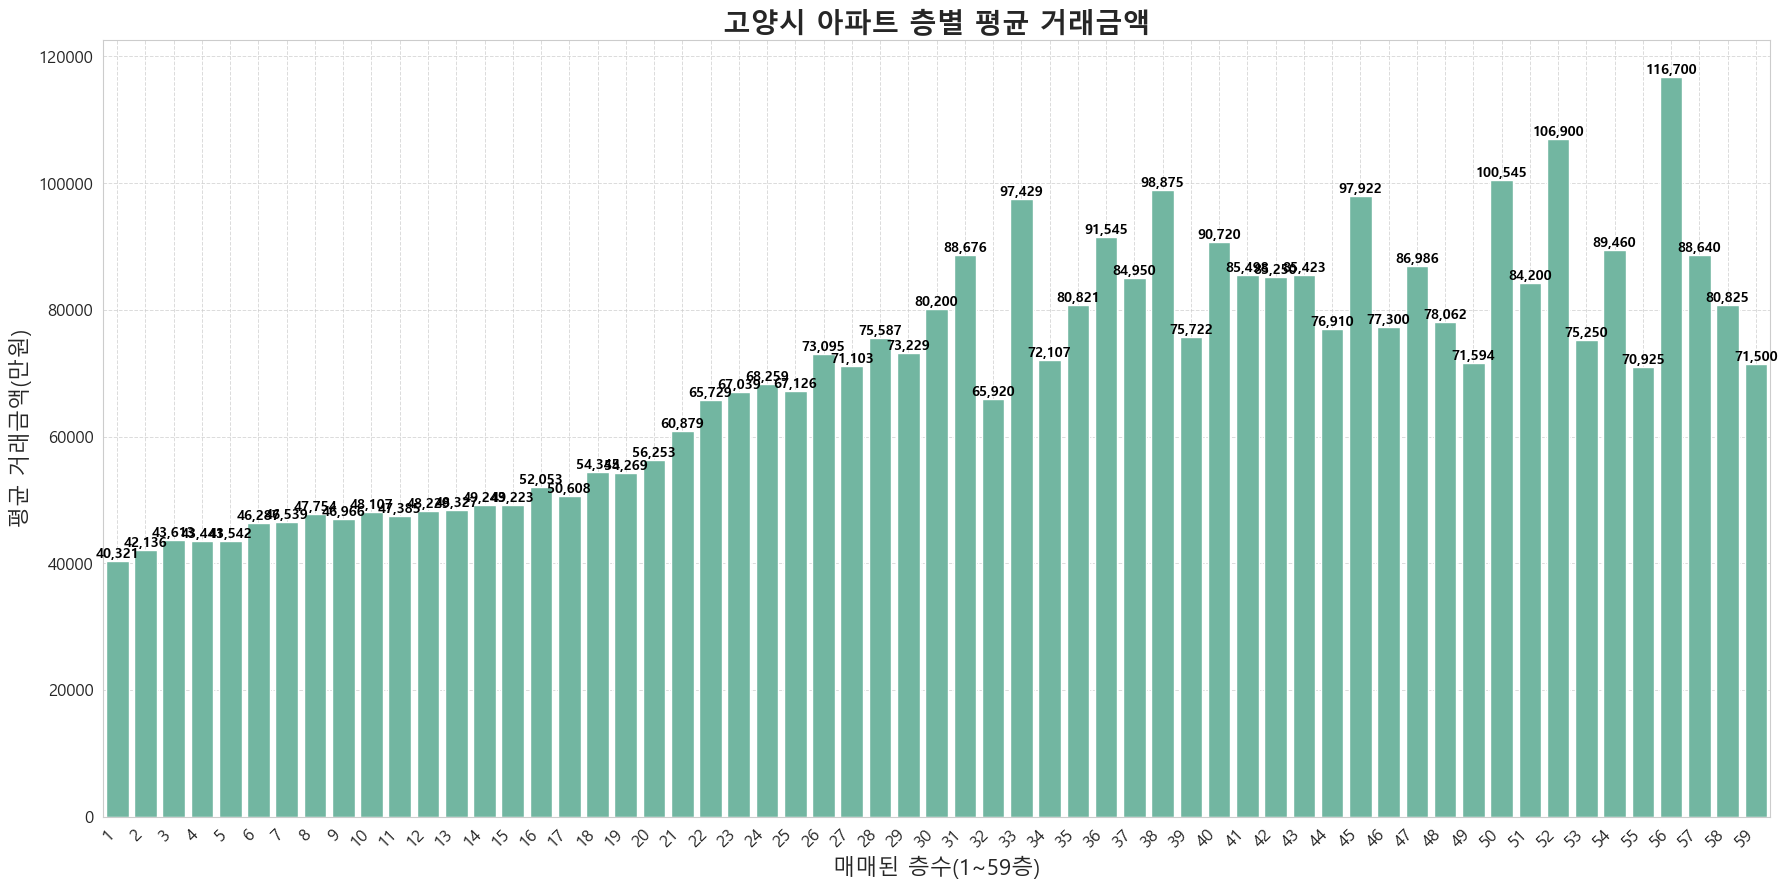

In [69]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_floor_price = goyang_apt_tx.copy()

# 층별 평균 거래 금액 계산
floor_avg_price = goyang_floor_price.groupby('floor')['dealAmount'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.barplot(data=floor_avg_price, x='floor', y='dealAmount')

# 제목과 축 레이블 설정
plt.title('고양시 아파트 층별 평균 거래금액', fontsize=20, weight='bold')
plt.xlabel('매매된 층수(1~59층)', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 층별 평균 거래 금액 라벨 추가
for i in range(len(floor_avg_price)):
    plt.text(i, floor_avg_price['dealAmount'][i], f'{floor_avg_price["dealAmount"][i]:,.0f}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [81]:
goyang_apt_tx

,aptNm,buildYear,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,excluUseAr,floor,sggCd,umdNm,dealYearMonth
0,햇빛주공23,1996,40000.0,28,1,2022,중개거래,49.9600,7,41281,행신동,20221
1,푸른마을10단지,2009,50500.0,27,1,2022,중개거래,106.4462,13,41281,고양동,20221
2,도래울파크뷰(PARKVIEW),2013,79000.0,29,1,2022,중개거래,84.3800,15,41281,도내동,20221
3,햇빛주공23,1996,43000.0,28,1,2022,중개거래,59.9700,13,41281,행신동,20221
4,은빛마을11단지,1996,47600.0,22,1,2022,중개거래,50.0000,11,41281,화정동,20221
...,...,...,...,...,...,...,...,...,...,...,...,...
17440,탄현마을(부영3),1995,21000.0,4,8,2024,중개거래,46.5800,10,41287,탄현동,20248
17441,강선마을14단지두산,1994,42000.0,5,8,2024,중개거래,59.7600,13,41287,주엽동,20248
17442,미주(19-8),1989,11000.0,1,8,2024,중개거래,57.5000,5,41287,일산동,20248
17443,후곡마을(주공),1995,36000.0,3,8,2024,중개거래,68.1300,6,41287,일산동,20248


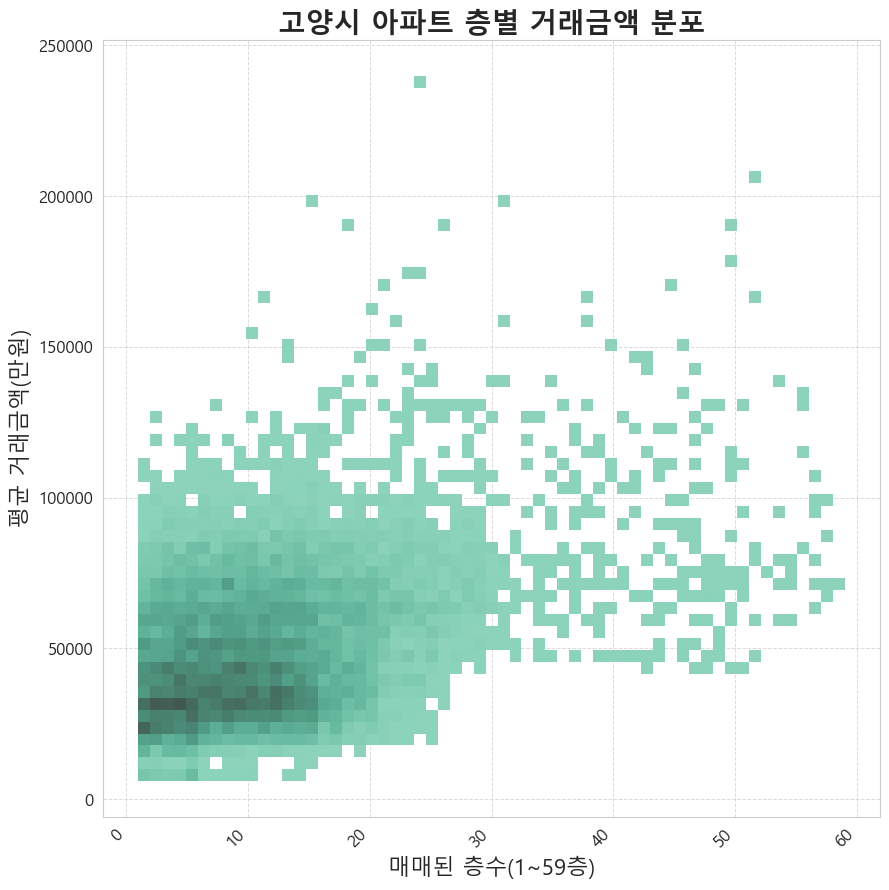

In [100]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

goyang_floor_price = goyang_apt_tx.copy()

# 그래프 설정
plt.figure(figsize=(9, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.histplot(data=goyang_floor_price, x='floor', y='dealAmount', bins=59)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 층별 거래금액 분포', fontsize=20, weight='bold')
plt.xlabel('매매된 층수(1~59층)', fontsize=16)
plt.ylabel('평균 거래금액(만원)', fontsize=16)

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


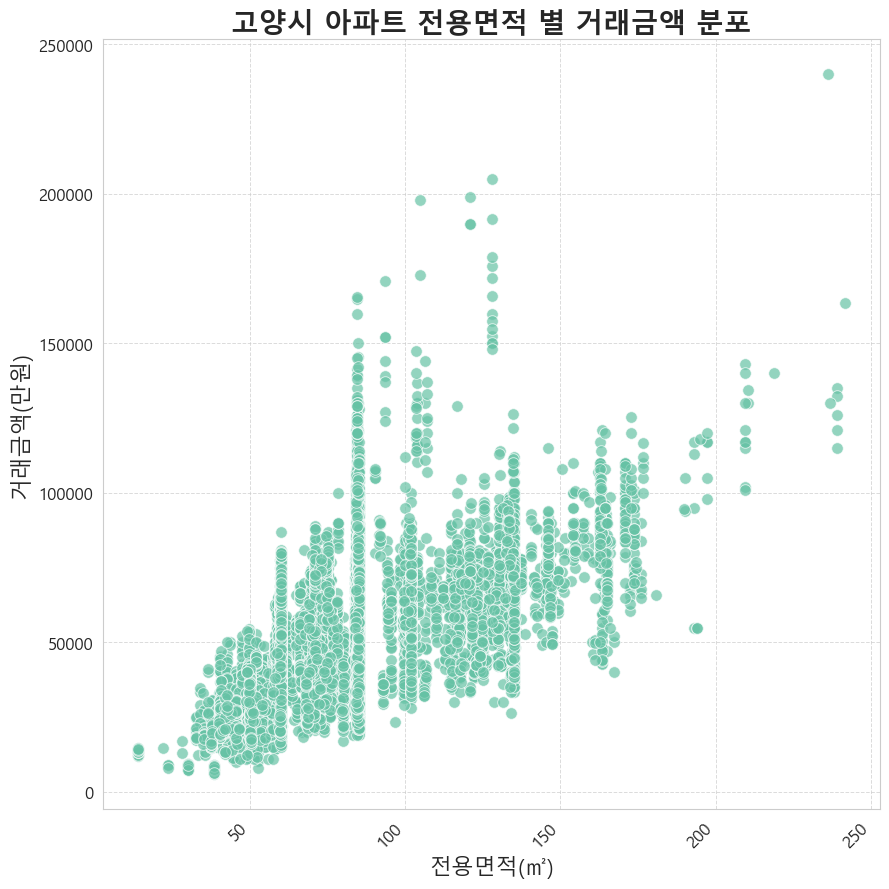

In [101]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

goyang_floor_price = goyang_apt_tx.copy()

# 그래프 설정
plt.figure(figsize=(9, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용

# 산점도 설정 (점의 크기와 투명도 조정)
sns.scatterplot(data=goyang_floor_price, x='excluUseAr', y='dealAmount', 
                s=70, alpha=0.7)  # 점 크기(s=70)와 투명도(alpha=0.7) 조정

# 제목과 축 레이블 설정
plt.title('고양시 아파트 전용면적 별 거래금액 분포', fontsize=20, weight='bold')
plt.xlabel('전용면적(㎡)', fontsize=16)
plt.ylabel('거래금액(만원)', fontsize=16)

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
